In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils.np_utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense ,Input, Flatten, Conv2D , Softmax, MaxPooling2D,Add,Dropout

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

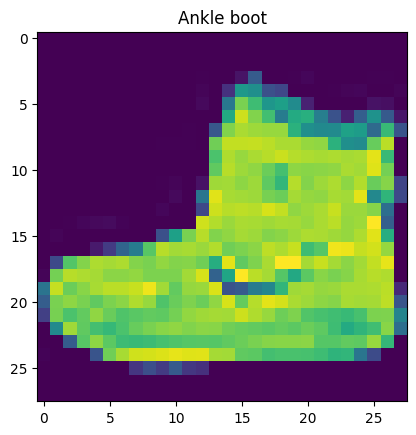

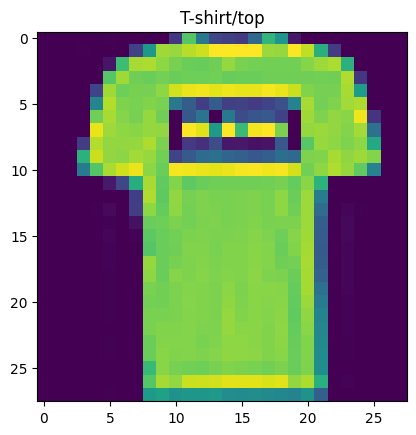

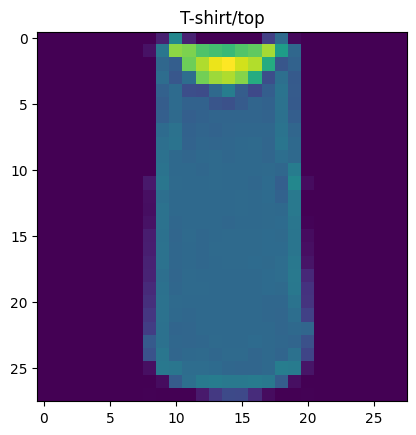

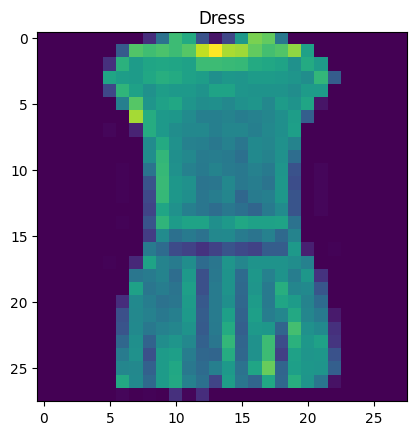

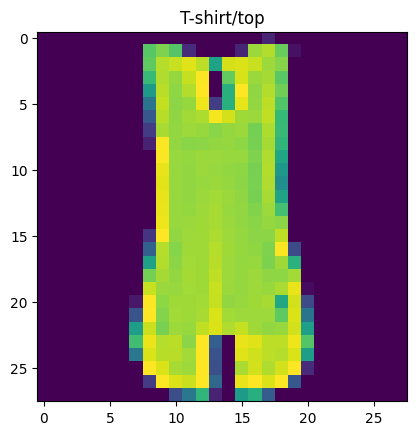

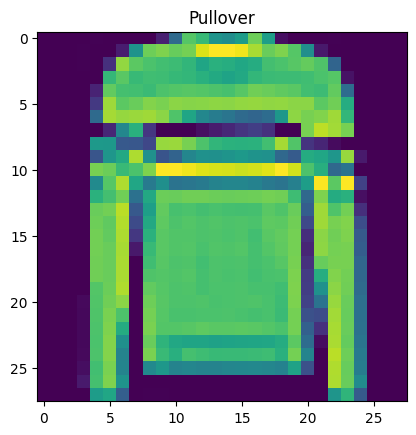

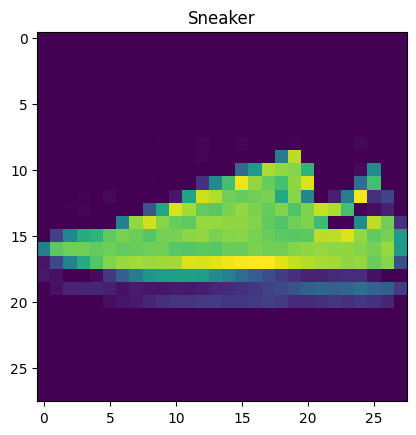

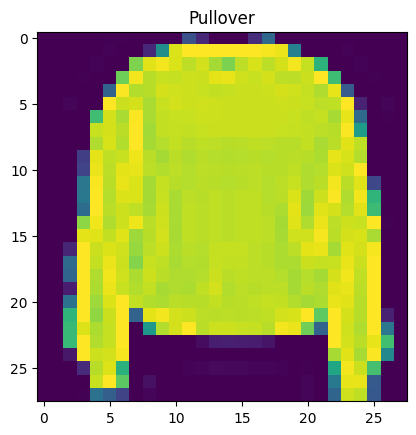

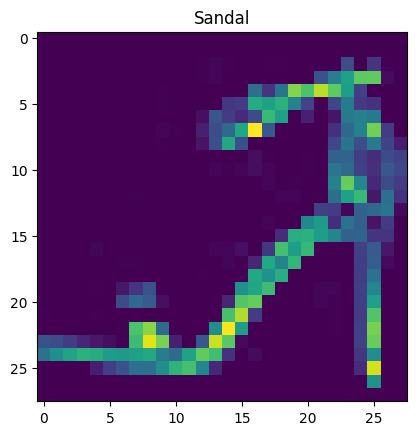

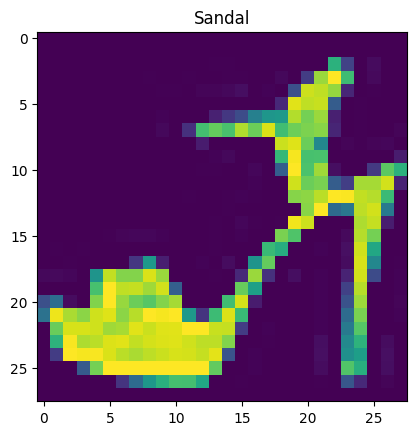

In [13]:
for i in range(10):
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])
    plt.show()

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
x_train = x_train/ 255.0

x_test = x_test / 255.0

In [16]:
y_train = to_categorical(y_train,num_classes = 10)
y_test = to_categorical(y_test,num_classes = 10)

In [26]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [27]:
input_layer = Input(shape =(28, 28,1))
layer1 = Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu')(input_layer)
layer2 = MaxPooling2D(pool_size = (2,2))(layer1)
layer3 = Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu')(layer2)
layer4 = MaxPooling2D(pool_size = (2,2))(layer3)
layer5 = Conv2D(filters = 64, kernel_size = (1,1), activation = 'relu')(layer4)
layer6 = MaxPooling2D(pool_size = (2,2))(layer5)
layer7 = Flatten()(layer6)
layer8 = Dense(64,activation = 'relu')(layer7)
layer9 = Dropout(0.5)(layer8)
layer10 = Dense(10,activation = 'softmax')(layer9)

model_func = Model(inputs=input_layer, outputs=layer10)

print(model_func.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 64)          2112

In [28]:
model_func.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

model_func.fit(x_train,y_train,epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 0.8056 - accuracy: 0.7100
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5692 - accuracy: 0.7939
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5049 - accuracy: 0.8152
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4639 - accuracy: 0.8311
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4369 - accuracy: 0.8408
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4127 - accuracy: 0.8502
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4001 - accuracy: 0.8535
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3854 - accuracy: 0.8597
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3787 - accuracy: 0.8633
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.36

In [29]:
train_loss, train_acc= model_func.evaluate(x_train,  y_train, verbose=2)
test_loss, test_acc= model_func.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

1875/1875 - 5s - loss: 0.2342 - accuracy: 0.9097 - 5s/epoch - 3ms/step
313/313 - 1s - loss: 0.3301 - accuracy: 0.8863 - 915ms/epoch - 3ms/step

Test accuracy: 0.8863000273704529


In [30]:
prediction = model_func.predict(x_test)

313/313 [==============================] - 1s 2ms/step


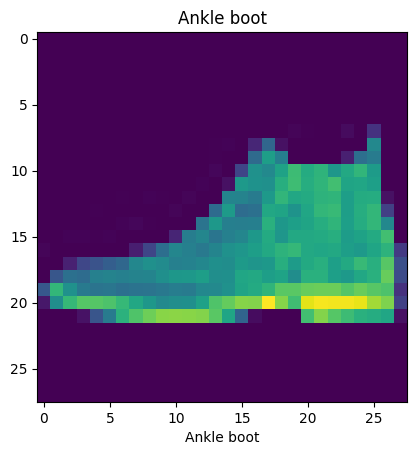

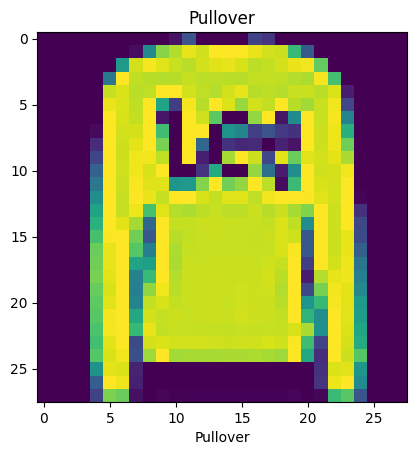

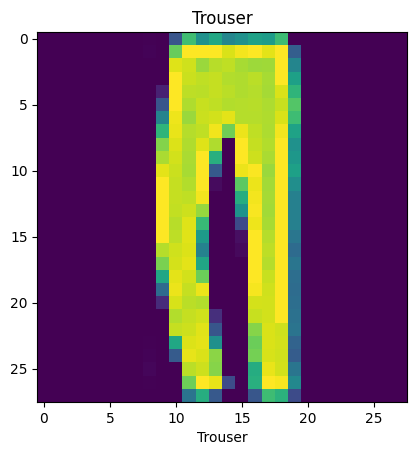

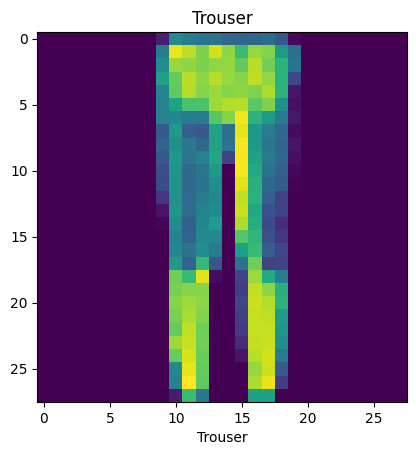

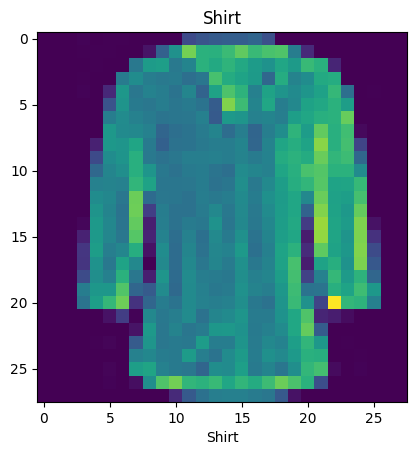

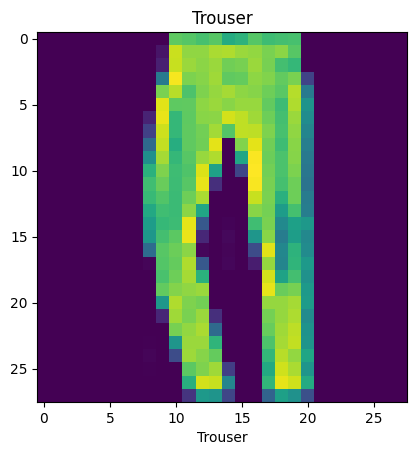

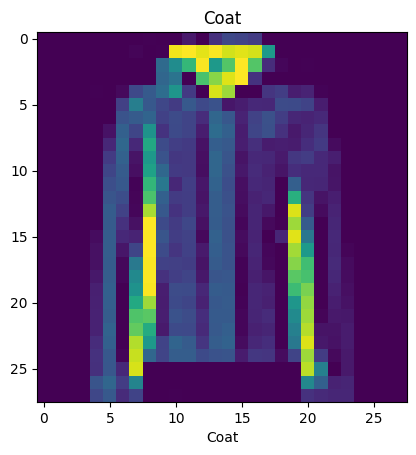

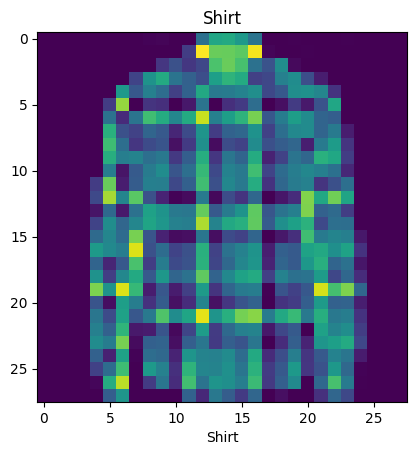

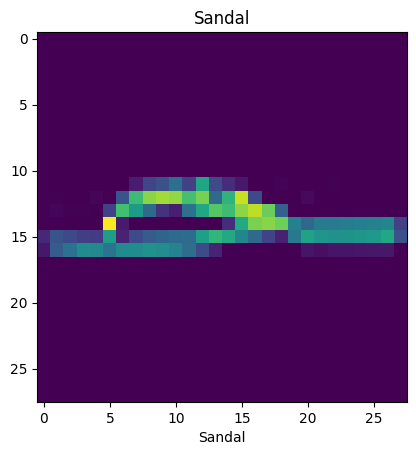

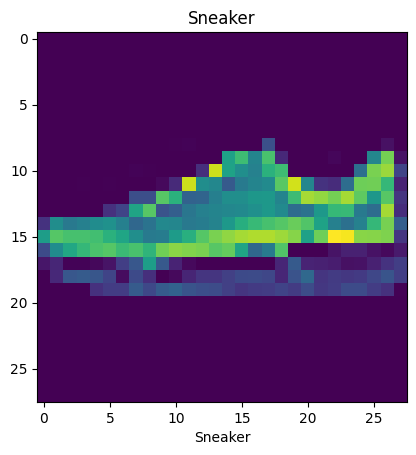

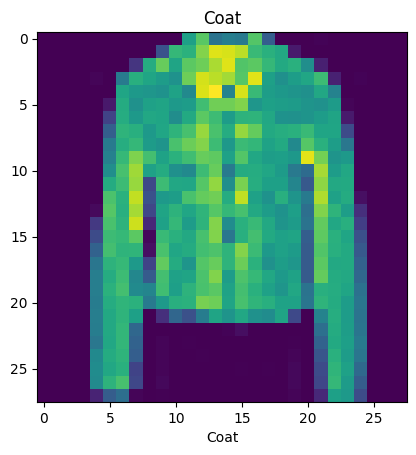

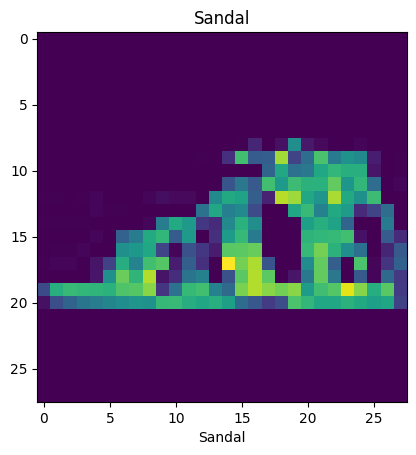

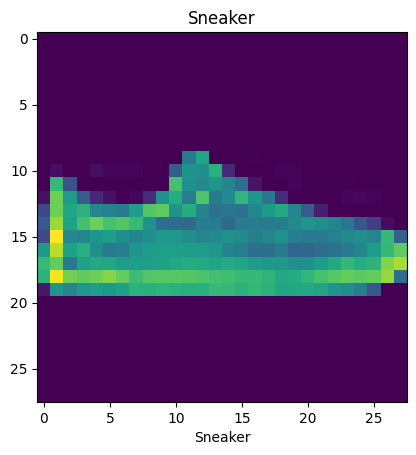

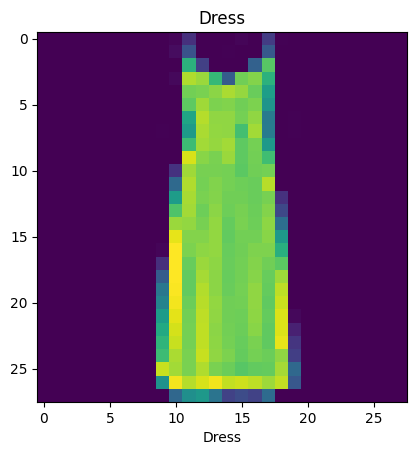

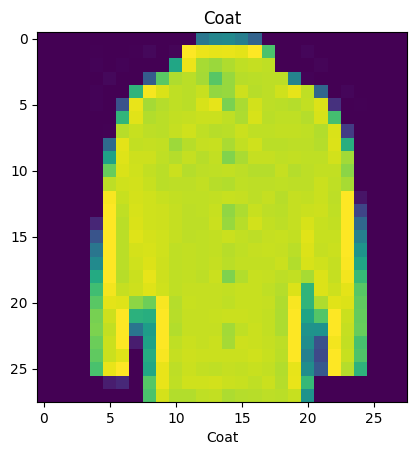

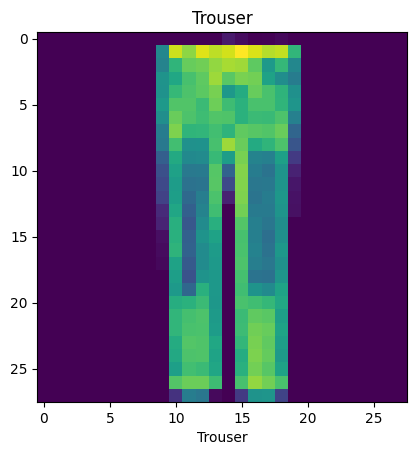

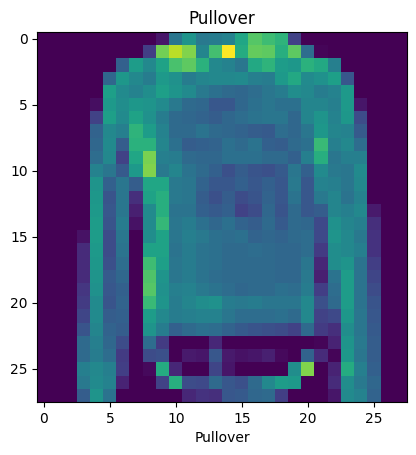

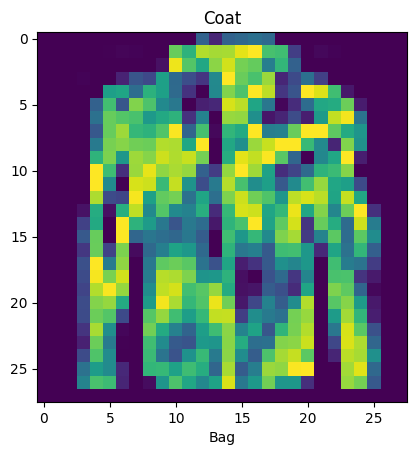

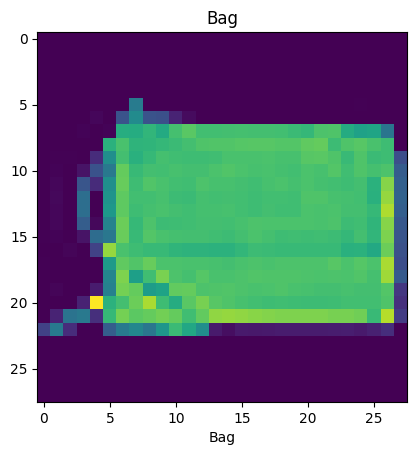

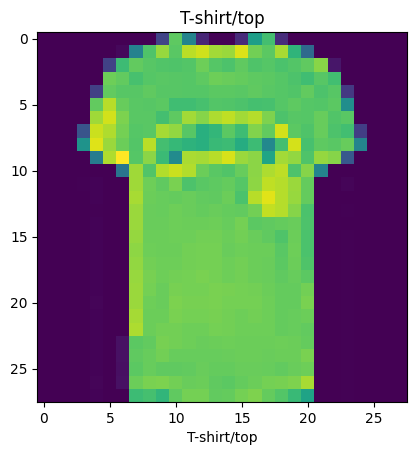

In [31]:
for i in range(20):
    pred = class_names[np.argmax(prediction[i])]
    
    true_label = class_names[np.argmax(y_test[i])]
    
    plt.imshow(x_test[i])
    plt.title(true_label)
    plt.xlabel(pred)
    plt.show()